In [1]:
import numpy as np
import matplotlib.pyplot as plt
import genfibers as gf

In [30]:
Nx = 1024
xmin = -20E-3
xmax = 20E-3
x = np.linspace(xmin, xmax, Nx)

Nz = 1024
zmin = 0E-3
zmax = 40E-3
z = np.linspace(zmin, zmax, Nz)

y = 0

X, Y, Z = np.meshgrid(x, y, z)
points = np.array([X.flatten(), Y.flatten(), Z.flatten()])

In [29]:
points

array([[-0.02, -0.02, -0.02, ...,  0.02,  0.02,  0.02],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.02, -0.02, -0.02, ...,  0.02,  0.02,  0.02]])

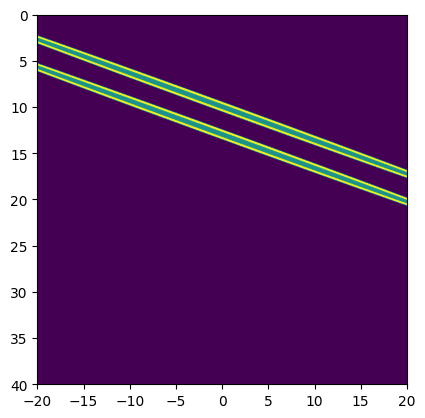

In [96]:
fibermap = 0
fibermap -= gf.gengeneral(points, gf.sphere, [30E-3, 1E-3, 0.25E-3], [0, np.pi/9, 0], [0, 0, 10E-3])
fibermap += 2*gf.gengeneral(points, gf.sphere, [35E-3, 1E-3, 0.5E-3], [0, np.pi/9, 0], [0, 0, 10E-3])
fibermap -= gf.gengeneral(points, gf.sphere, [30E-3, 1E-3, 0.25E-3], [0, np.pi/9, 0], [0, 0, 13E-3])
fibermap += 2*gf.gengeneral(points, gf.sphere, [35E-3, 1E-3, 0.5E-3], [0, np.pi/9, 0], [0, 0, 13E-3])
fibermap = fibermap.reshape((Nx, Nz)).T

extent = 1E3*np.array([xmin, xmax, zmax, zmin])

plt.figure()
plt.imshow(fibermap, extent=extent)
plt.show()

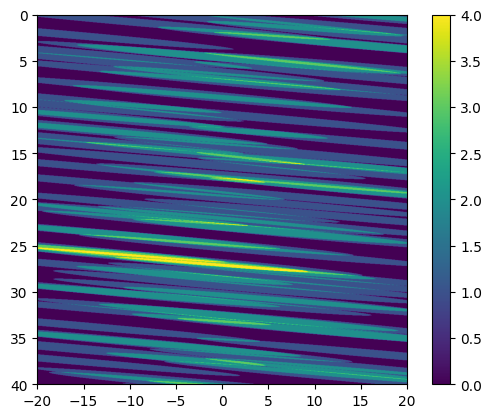

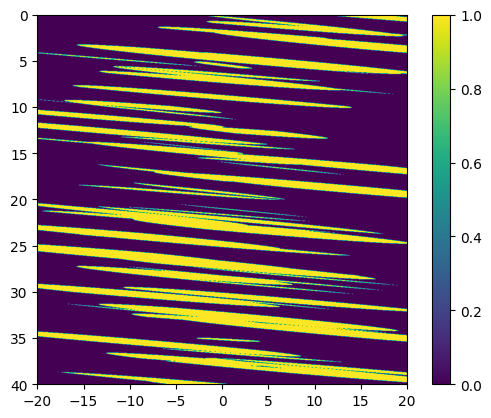

In [95]:
N = 200
rng = np.random.default_rng()
dz_c = rng.normal(500E-6, 100E-6, N)
dz_c[dz_c<50E-6] = 50E-6
z_c = np.cumsum(dz_c) - 10E-3
x_c = rng.uniform(-20E-3, 20E-3, N)
r = rng.normal(400E-6, 30E-6, N)
r[r<100E-6] = 100E-6

fmap = np.zeros(points.shape[1])
for ind in range(N):
    fmap += gf.gengeneral(points, gf.sphere, [20E-3, 1E-3, r[ind]], [0, np.pi/36, 0], [x_c[ind], 0, z_c[ind]])

fmap = fmap.reshape((Nx, Nz)).T

extent = 1E3*np.array([xmin, xmax, zmax, zmin])

plt.figure()
plt.imshow(fmap, extent=extent)
plt.colorbar()
plt.show()
fmap2 = fmap>1
plt.figure()
plt.imshow(fmap2, extent=extent)
plt.colorbar()
plt.show()